# Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable apple

In [3]:
url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


# Step 4. Check out the type of the columns

In [6]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

# Step 5. Transform the Date column as a datetime type

In [7]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

# Step 6. Set the date as the index

In [9]:
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [10]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 6 columns):
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1)
memory usage: 462.9 KB


# Step 7. Is there any duplicate dates?

In [12]:
apple.index.is_unique

True

# Step 8. Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [13]:
apple.sort_index(ascending=True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


# Step 9. Get the last business day of each month

In [15]:
apple_month = apple.resample('BM').mean()
apple_month.shape

(404, 6)

# Step 10. What is the difference in days between the first day and the oldest

In [17]:
(apple.index.max() - apple.index.min()).days

12261

# Step 11. How many months in the data we have?

In [20]:
apple_months = apple.resample('BM').mean()
len(apple_months)

404

In [22]:
apple_month.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571
2014-06-30,222.360000,224.084286,220.735714,222.658095,5.745506e+07,91.885714
2014-07-31,94.294000,95.004000,93.488000,94.470000,4.218366e+07,94.470000


# Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

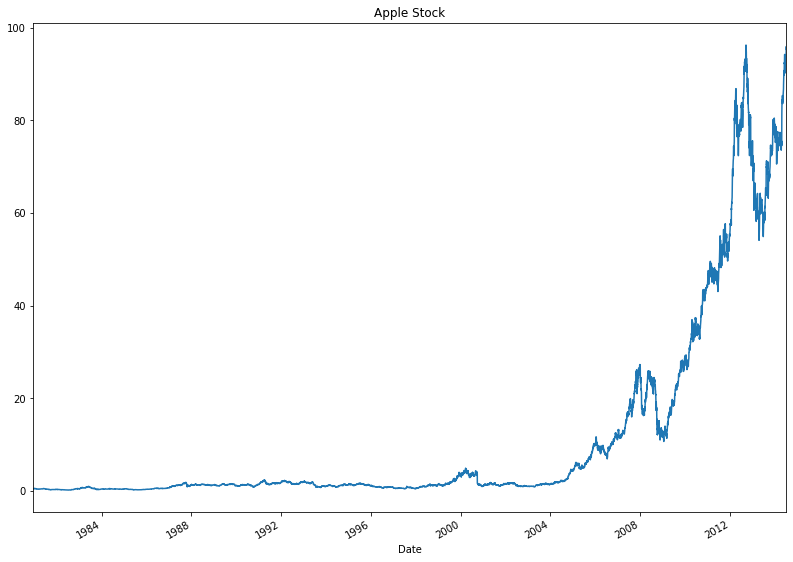

In [27]:
appl_open = apple['Adj Close'].plot(title='Apple Stock')
fig = appl_open.get_figure()
fig.set_size_inches(13.5,10)